Example from https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

- Trains a simple convnet on the MNIST dataset.
- Gets to 99.25% test accuracy after 12 epochs
 (there is still a lot of margin for parameter tuning).
- 16 seconds per epoch on a GRID K520 GPU.

Keras seems to use Theano as backend by default. To change to using TensorFlow, edit ~/.keras/keras.json and replace `theano` with `tensorflow`.

Or set environment value: `KERAS_BACKEND=tensorflow`. 

See https://keras.io/backend/

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


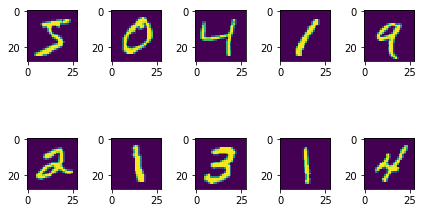

In [4]:
fig, ax = plt.subplots(2, 5)
for i, a in enumerate(ax.flatten()):
    a.imshow(x_train[i])
fig.tight_layout()

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# convert class vectors to binary class matrices
print(y_test.shape)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(10000,)
(10000, 10)


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 147s - loss: 0.3321 - acc: 0.8982 - val_loss: 0.0821 - val_acc: 0.9754
Epoch 2/12
60000/60000 [==============================] - 149s - loss: 0.1131 - acc: 0.9670 - val_loss: 0.0592 - val_acc: 0.9805
Epoch 3/12
60000/60000 [==============================] - 149s - loss: 0.0881 - acc: 0.9740 - val_loss: 0.0435 - val_acc: 0.9852
Epoch 4/12
60000/60000 [==============================] - 144s - loss: 0.0716 - acc: 0.9786 - val_loss: 0.0405 - val_acc: 0.9878
Epoch 5/12
60000/60000 [==============================] - 144s - loss: 0.0652 - acc: 0.9813 - val_loss: 0.0391 - val_acc: 0.9874
Epoch 6/12
60000/60000 [==============================] - 144s - loss: 0.0568 - acc: 0.9827 - val_loss: 0.0323 - val_acc: 0.9887
Epoch 7/12
60000/60000 [==============================] - 149s - loss: 0.0513 - acc: 0.9849 - val_loss: 0.0310 - val_acc: 0.9898
Epoch 8/12
60000/60000 [=======================

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0306601490876
Test accuracy: 0.9896


In [13]:
pred = model.predict_classes(x_test)
print('\n', pred[:10])

10000/10000 [==============================] - 4s     

 [7 2 1 0 4 1 4 9 5 9]


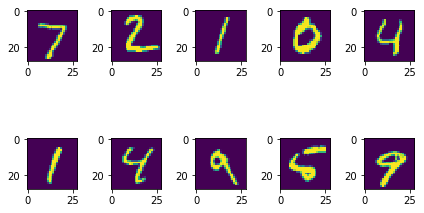

In [14]:
fig, ax = plt.subplots(2, 5)
for i, a in enumerate(ax.flatten()):
    a.imshow(x_test[i].reshape((28, 28)))
fig.tight_layout()

In [25]:
# Reload the data to compare predictions vs. actual on test data:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(np.mean(pred != y_test))
inds = np.where(pred != y_test)[0]
print(inds, '\n', pred[inds], '\n', y_test[inds])

0.0104
[  62  321  340  445  543  582  659  717  740  844  882  883  938  947 1014
 1039 1112 1182 1226 1232 1247 1260 1319 1326 1364 1414 1530 1549 1621 1681
 1709 1717 1754 1790 1878 1901 2035 2040 2043 2109 2118 2129 2130 2135 2280
 2293 2387 2406 2454 2462 2488 2597 2654 2896 2921 2927 2939 3030 3060 3073
 3422 3503 3520 3558 3559 3597 3727 3767 3808 3941 4075 4176 4205 4238 4248
 4256 4497 4507 4536 4639 4740 4761 4807 5937 5955 6081 6091 6571 6576 6597
 6625 6651 6783 8325 8408 9009 9015 9019 9530 9664 9692 9729 9770 9982] 
 [5 7 3 0 7 2 1 5 9 7 7 5 5 9 5 2 6 5 2 4 5 1 0 2 2 7 7 6 6 7 5 0 2 7 3 4 3
 6 8 7 0 2 9 1 5 0 1 4 5 0 4 3 1 0 2 7 5 0 7 2 0 1 4 0 5 3 9 2 8 6 6 7 1 3
 1 2 7 2 5 9 5 8 0 3 8 5 5 3 1 7 2 8 6 6 6 2 2 2 8 7 7 6 0 6] 
 [9 2 5 6 8 8 2 0 4 8 9 3 3 8 6 7 4 6 7 9 9 7 8 7 8 9 8 4 0 3 9 8 7 2 8 9 5
 5 4 3 6 9 4 6 3 9 9 9 6 2 2 5 6 8 3 3 9 6 9 1 6 9 6 5 8 9 8 7 7 4 8 2 2 7
 2 3 8 1 6 8 3 9 8 5 3 9 9 9 7 0 8 0 1 0 8 7 7 7 9 2 9 5 5 5]


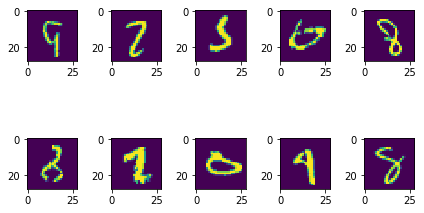

In [28]:
fig, ax = plt.subplots(2, 5)
for i, a in enumerate(ax.flatten()):
    a.imshow(x_test[inds[i]])
fig.tight_layout()